In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Paths
meta_dir = "../data/processed/metadata_v2"
clients = {
    "Client 1": "client_1_meta_v2.csv",
    "Client 2": "client_2_meta_v2.csv",
    "Client 3": "client_3_meta_v2.csv",
    "Client 4": "client_4_meta_v2.csv"
}


In [3]:
# Print shape and column overview
for name, file in clients.items():
    df = pd.read_csv(os.path.join(meta_dir, file))
    print(f"🔍 {name}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}\n")


🔍 Client 1
Shape: (5000, 27)
Columns: ['sender_domain_length', 'sender_has_digits', 'sender_has_special_chars', 'sender_tld', 'sender_is_public_domain', 'receiver_is_undisclosed', 'receiver_is_public_domain', 'sender_equals_receiver', 'email_hour', 'email_weekday', 'is_weekend', 'is_midnight_hour', 'has_valid_date', 'url_present', 'url_count_in_body', 'url_avg_length', 'url_max_length', 'url_has_ip', 'url_has_special_chars', 'url_has_redirect', 'url_suspicious_tld', 'subject_length', 'body_length', 'text_combined_length', 'uppercase_ratio', 'exclamation_count', 'label']

🔍 Client 2
Shape: (3126, 27)
Columns: ['sender_domain_length', 'sender_has_digits', 'sender_has_special_chars', 'sender_tld', 'sender_is_public_domain', 'receiver_is_undisclosed', 'receiver_is_public_domain', 'sender_equals_receiver', 'email_hour', 'email_weekday', 'is_weekend', 'is_midnight_hour', 'has_valid_date', 'url_present', 'url_count_in_body', 'url_avg_length', 'url_max_length', 'url_has_ip', 'url_has_special_c

In [4]:
for name, file in clients.items():
    df = pd.read_csv(os.path.join(meta_dir, file))
    print(f"📌 Missing Value Check → {name}")
    print(df.isnull().sum())
    print("-" * 40)


📌 Missing Value Check → Client 1
sender_domain_length         0
sender_has_digits            0
sender_has_special_chars     0
sender_tld                   0
sender_is_public_domain      0
receiver_is_undisclosed      0
receiver_is_public_domain    0
sender_equals_receiver       0
email_hour                   0
email_weekday                0
is_weekend                   0
is_midnight_hour             0
has_valid_date               0
url_present                  0
url_count_in_body            0
url_avg_length               0
url_max_length               0
url_has_ip                   0
url_has_special_chars        0
url_has_redirect             0
url_suspicious_tld           0
subject_length               0
body_length                  0
text_combined_length         0
uppercase_ratio              0
exclamation_count            0
label                        0
dtype: int64
----------------------------------------
📌 Missing Value Check → Client 2
sender_domain_length         0
sender_has_d

/var/folders/d4/4d6dk50x4cjgbl61mz0_173c0000gn/T/ipykernel_32483/1054602953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2", ax=ax)
/var/folders/d4/4d6dk50x4cjgbl61mz0_173c0000gn/T/ipykernel_32483/1054602953.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Legit (0)", "Phishing (1)"])
/var/folders/d4/4d6dk50x4cjgbl61mz0_173c0000gn/T/ipykernel_32483/1054602953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2", ax=ax)
/var/folders/d4/4d6dk50x4cjgbl61mz0_173c0000gn/T/ipykernel_32483/1054602953.py:7: UserWarn

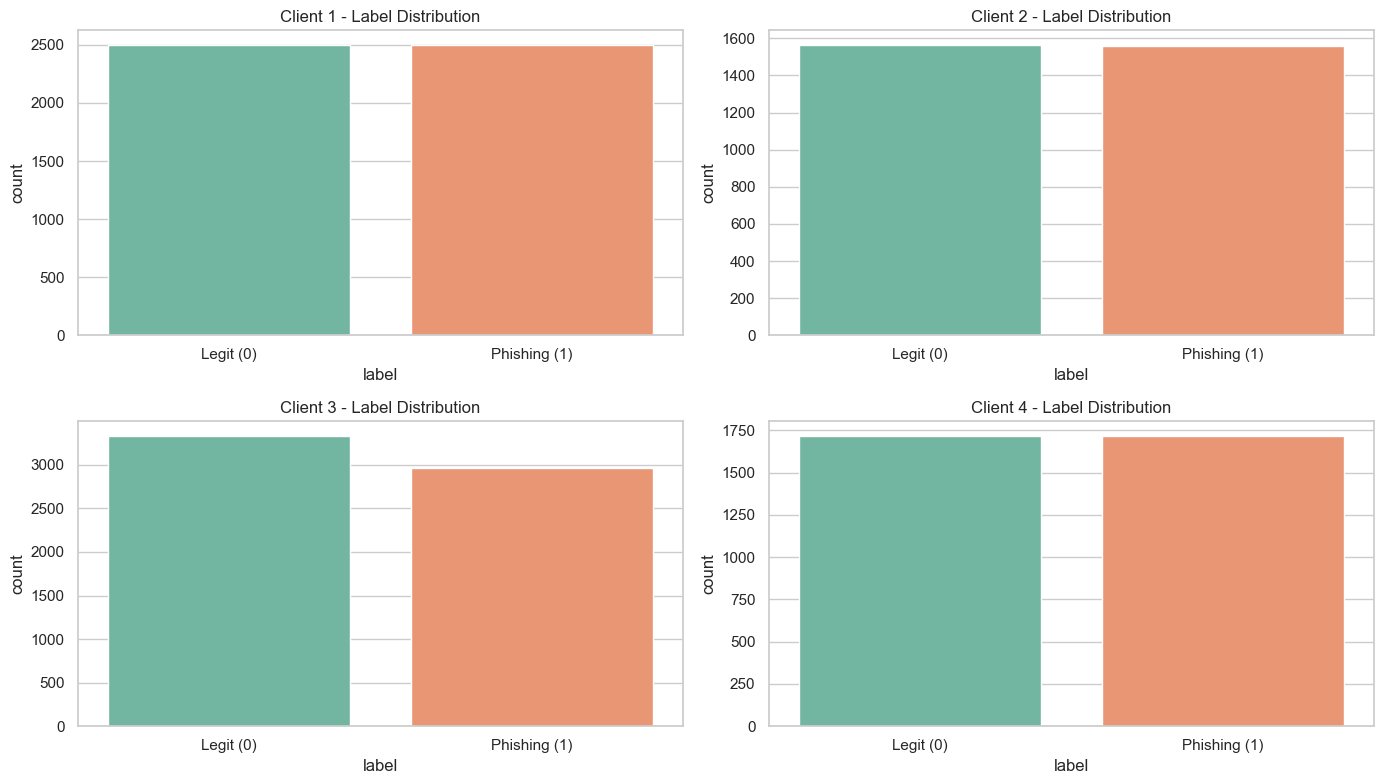

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for i, (name, file) in enumerate(clients.items()):
    df = pd.read_csv(os.path.join(meta_dir, file))
    ax = axes[i//2, i%2]
    sns.countplot(x="label", data=df, palette="Set2", ax=ax)
    ax.set_title(f"{name} - Label Distribution")
    ax.set_xticklabels(["Legit (0)", "Phishing (1)"])
plt.tight_layout()
plt.show()


In [6]:
for name, file in clients.items():
    df = pd.read_csv(os.path.join(meta_dir, file))
    print(f"🔍 Feature Uniqueness Report → {name}")
    for col in df.columns[:-1]:  # skip label
        unique_vals = df[col].nunique()
        if unique_vals <= 1:
            print(f"❌ {col} → CONSTANT")
        elif unique_vals <= 3:
            print(f"⚠️ {col} → Only {unique_vals} unique values")
    print("-" * 40)


🔍 Feature Uniqueness Report → Client 1
⚠️ sender_has_digits → Only 2 unique values
⚠️ sender_is_public_domain → Only 2 unique values
⚠️ receiver_is_undisclosed → Only 2 unique values
⚠️ receiver_is_public_domain → Only 2 unique values
⚠️ sender_equals_receiver → Only 2 unique values
⚠️ is_weekend → Only 2 unique values
⚠️ is_midnight_hour → Only 2 unique values
❌ has_valid_date → CONSTANT
⚠️ url_present → Only 2 unique values
⚠️ url_has_ip → Only 2 unique values
⚠️ url_has_redirect → Only 2 unique values
⚠️ url_suspicious_tld → Only 2 unique values
----------------------------------------
🔍 Feature Uniqueness Report → Client 2
⚠️ sender_has_digits → Only 2 unique values
⚠️ sender_is_public_domain → Only 2 unique values
⚠️ receiver_is_undisclosed → Only 2 unique values
⚠️ receiver_is_public_domain → Only 2 unique values
⚠️ sender_equals_receiver → Only 2 unique values
⚠️ is_weekend → Only 2 unique values
⚠️ is_midnight_hour → Only 2 unique values
⚠️ has_valid_date → Only 2 unique values

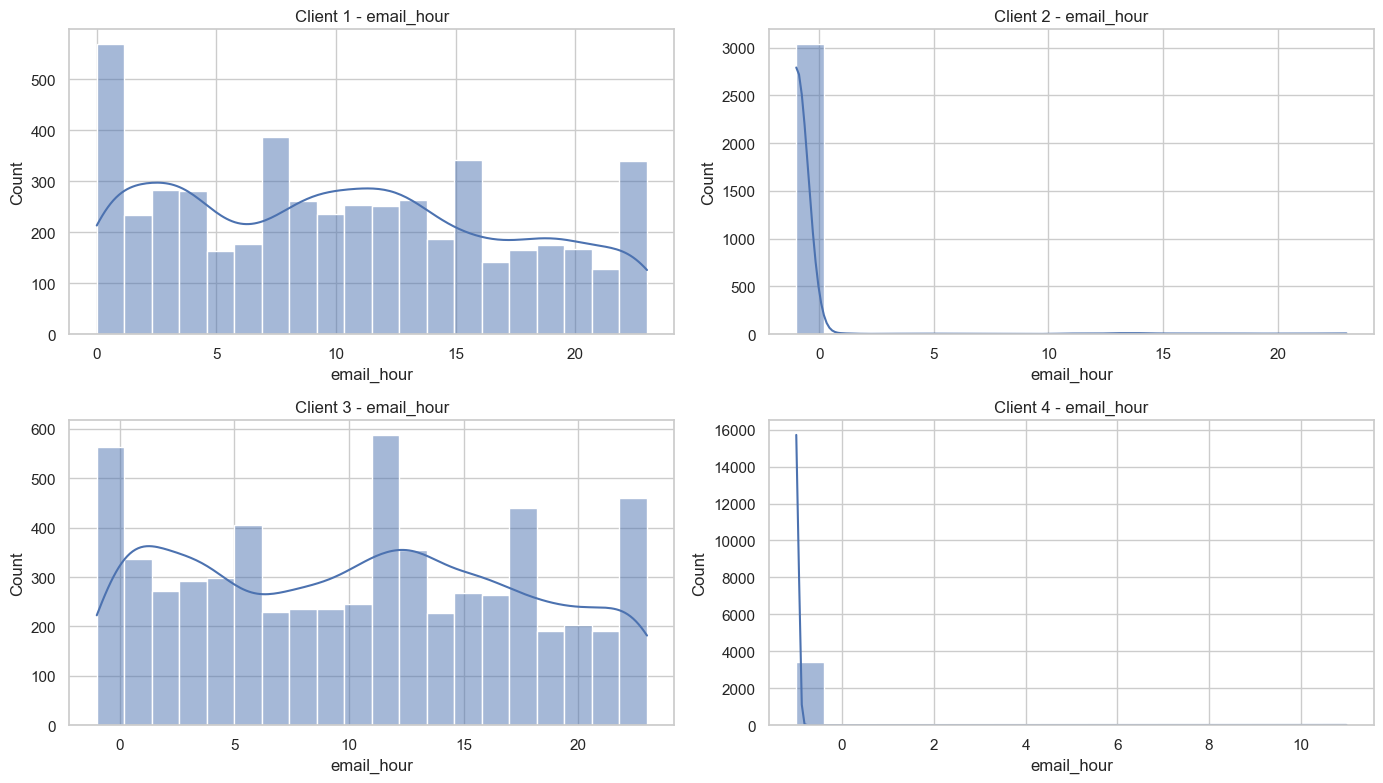

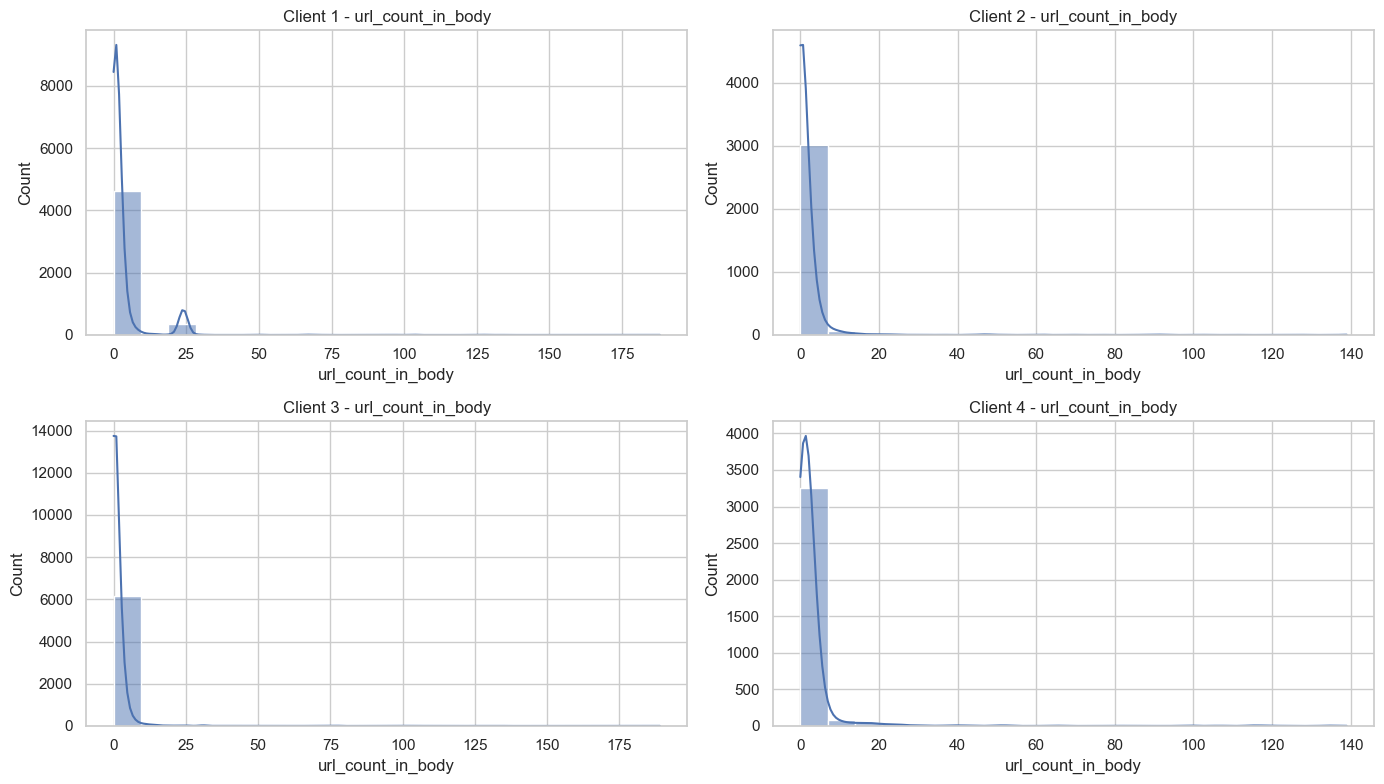

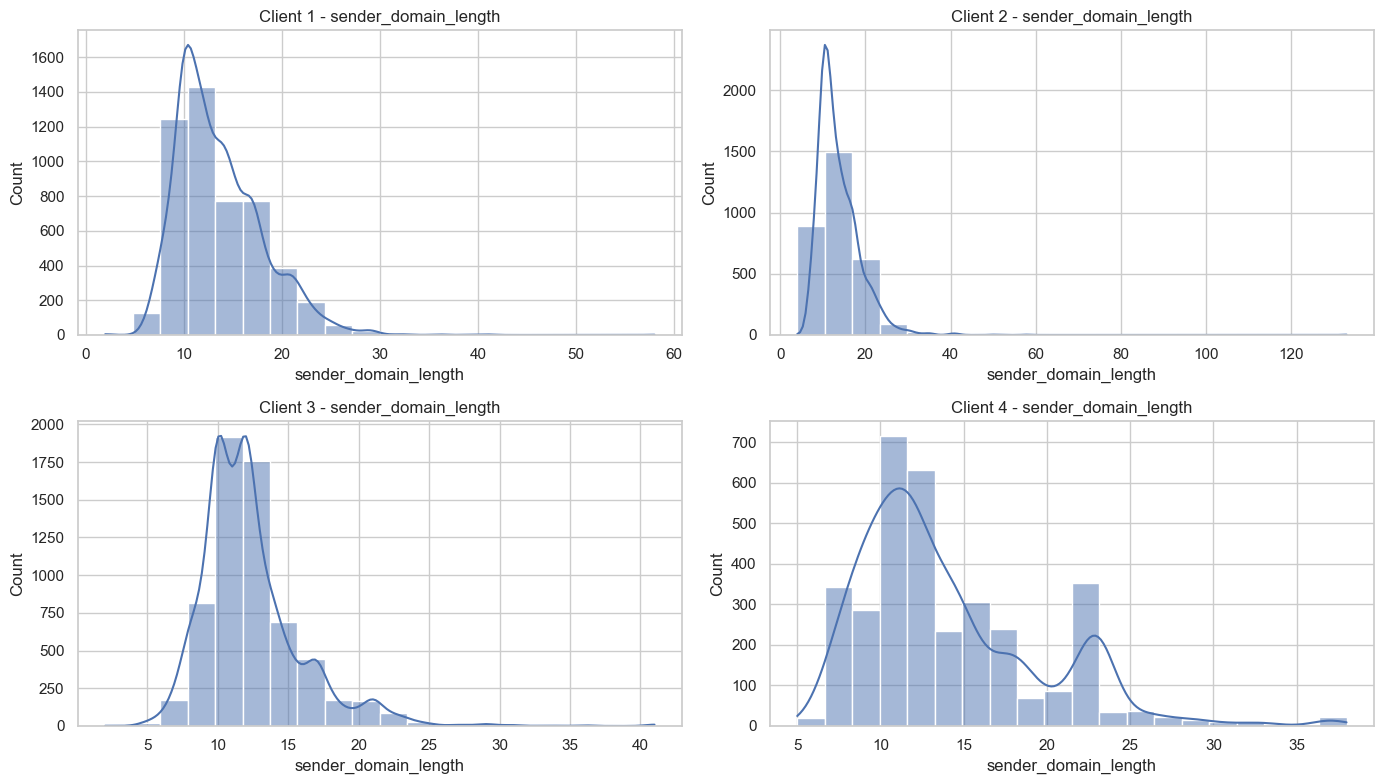

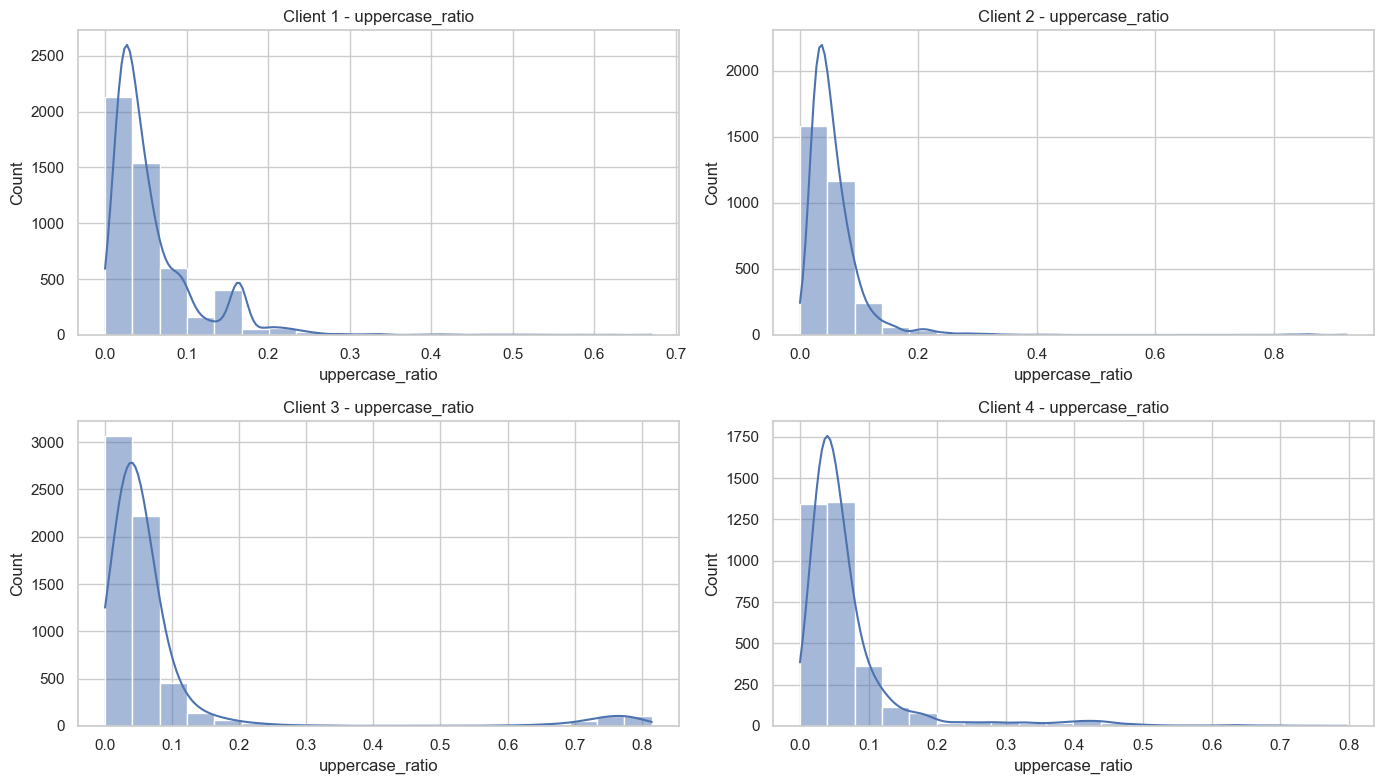

In [7]:
selected_features = ["email_hour", "url_count_in_body", "sender_domain_length", "uppercase_ratio"]

for feature in selected_features:
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    for i, (name, file) in enumerate(clients.items()):
        df = pd.read_csv(os.path.join(meta_dir, file))
        ax = axes[i//2, i%2]
        sns.histplot(df[feature], bins=20, kde=True, ax=ax)
        ax.set_title(f"{name} - {feature}")
    plt.tight_layout()
    plt.show()


/opt/anaconda3/envs/mbft_lite_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


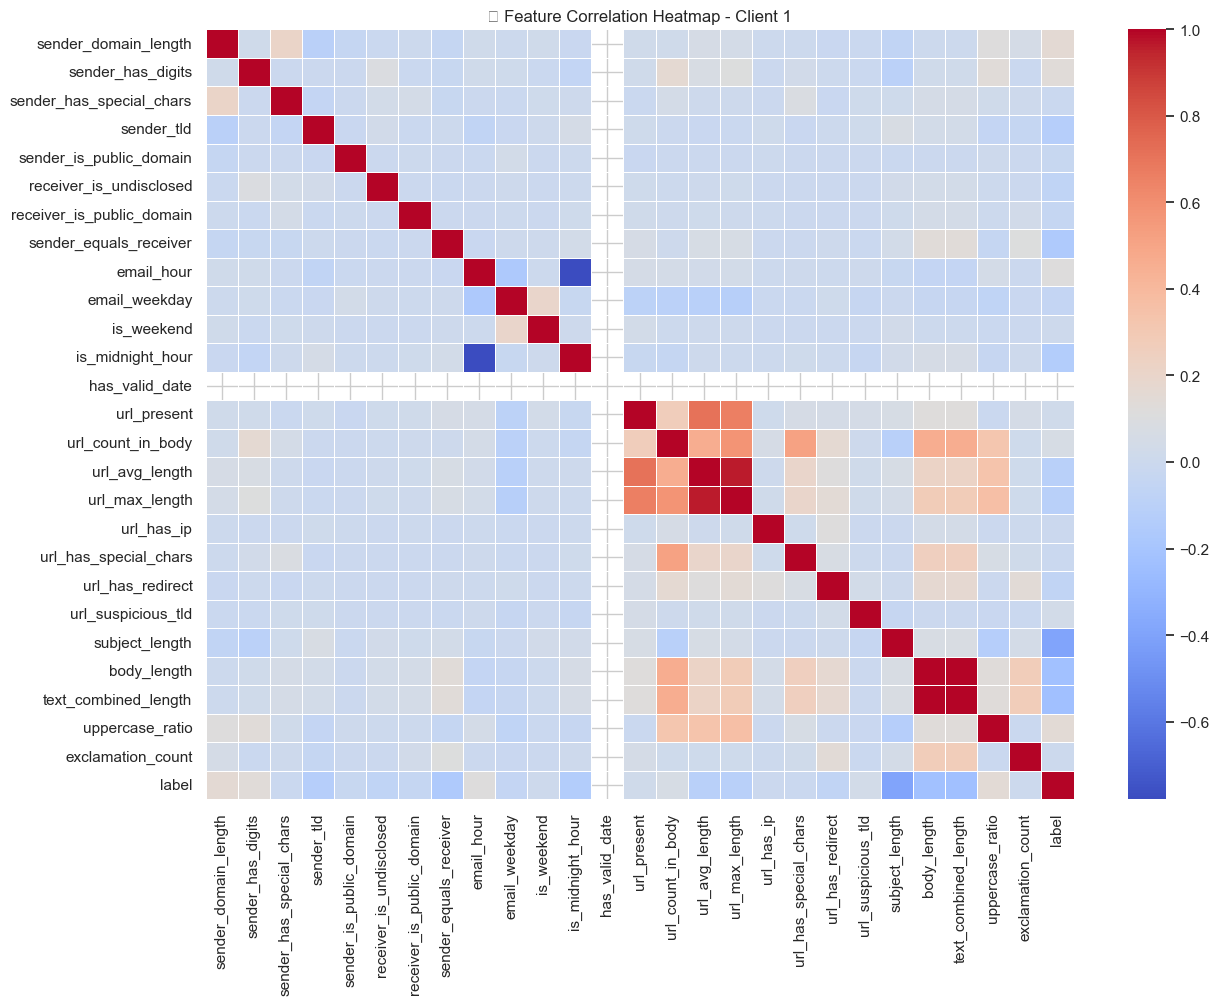

/opt/anaconda3/envs/mbft_lite_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


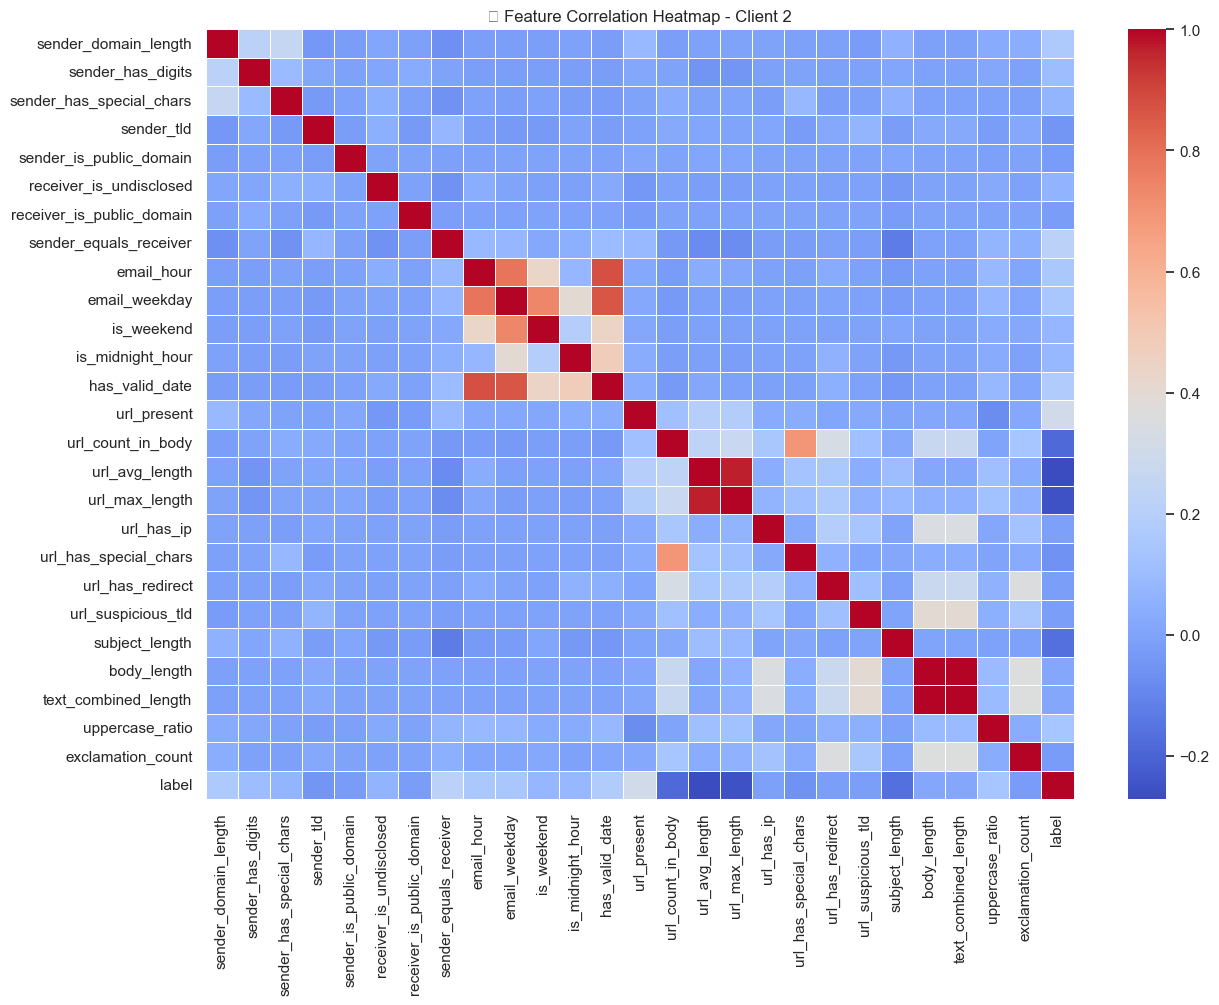

/opt/anaconda3/envs/mbft_lite_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


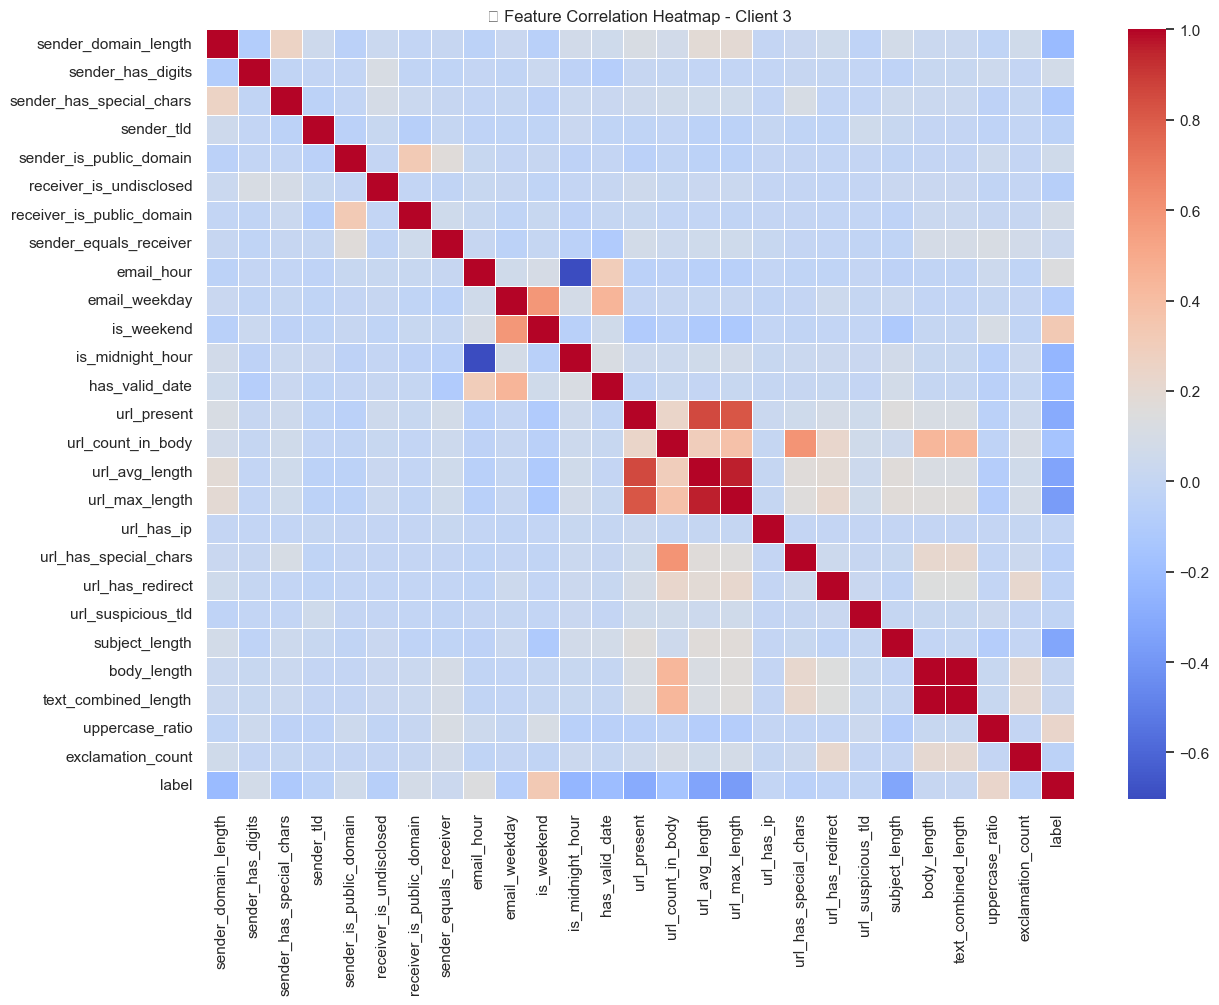

/opt/anaconda3/envs/mbft_lite_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


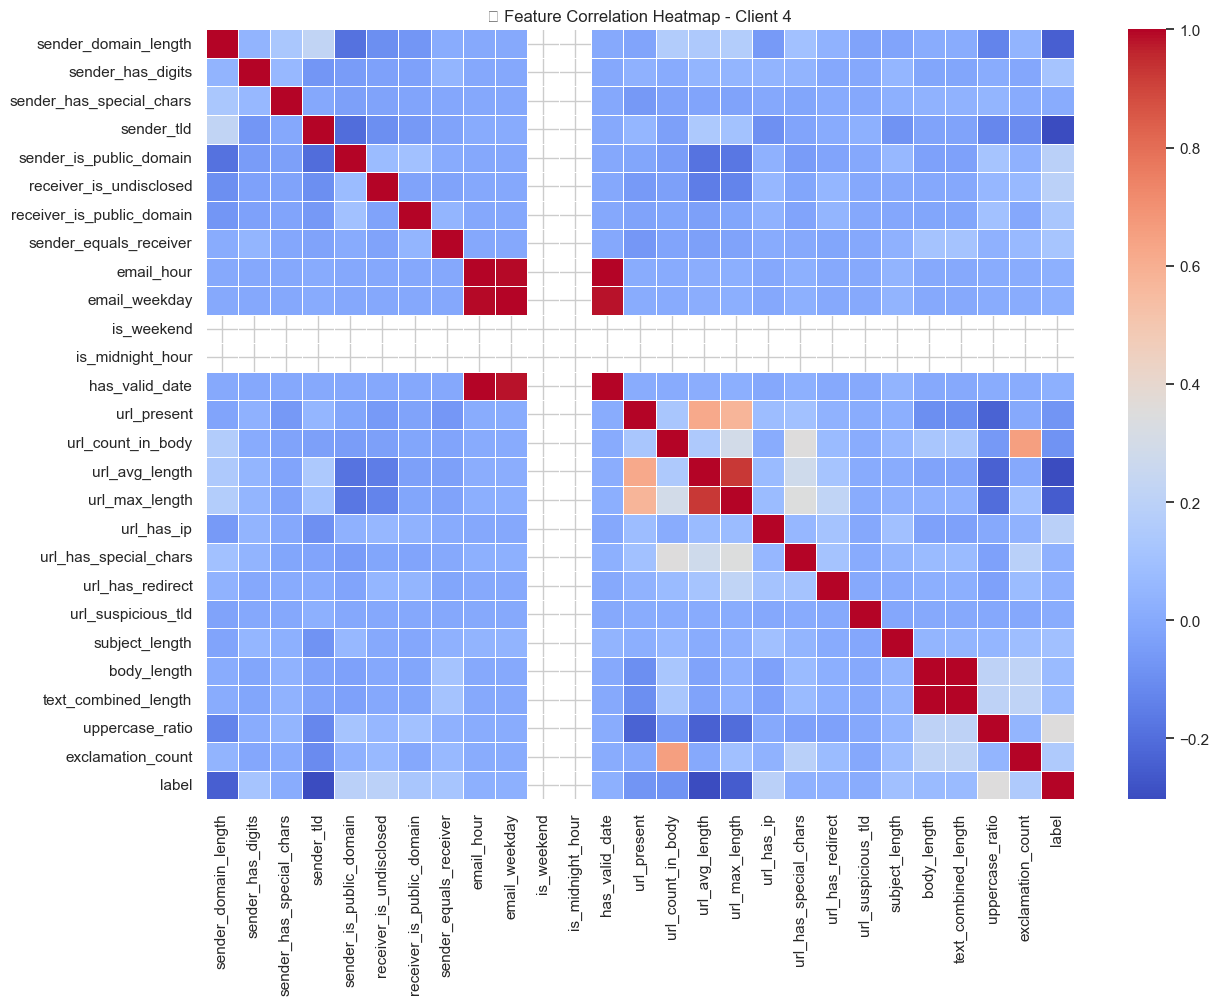

In [8]:
for name, file in clients.items():
    df = pd.read_csv(os.path.join(meta_dir, file))
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
    plt.title(f"🔗 Feature Correlation Heatmap - {name}")
    plt.show()


In [9]:
from sklearn.feature_selection import VarianceThreshold

for name, file in clients.items():
    df = pd.read_csv(os.path.join(meta_dir, file)).drop(columns=["label"])
    sel = VarianceThreshold(threshold=0.01)
    sel.fit(df)
    kept = df.columns[sel.get_support()]
    dropped = df.columns[~sel.get_support()]
    print(f"🧹 {name} - Low Variance Features Dropped: {list(dropped)}")


🧹 Client 1 - Low Variance Features Dropped: ['sender_is_public_domain', 'receiver_is_undisclosed', 'receiver_is_public_domain', 'is_weekend', 'has_valid_date', 'url_has_ip', 'url_has_redirect', 'url_suspicious_tld', 'uppercase_ratio']
🧹 Client 2 - Low Variance Features Dropped: ['sender_is_public_domain', 'receiver_is_public_domain', 'is_weekend', 'is_midnight_hour', 'url_has_ip', 'url_has_redirect', 'url_suspicious_tld', 'uppercase_ratio']
🧹 Client 3 - Low Variance Features Dropped: ['sender_is_public_domain', 'receiver_is_undisclosed', 'url_has_ip', 'url_has_redirect', 'url_suspicious_tld']
🧹 Client 4 - Low Variance Features Dropped: ['email_weekday', 'is_weekend', 'is_midnight_hour', 'has_valid_date', 'url_has_redirect', 'url_suspicious_tld', 'uppercase_ratio']
